1. Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import kaleido

import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


2. Data Exploration


In [3]:
df = pd.read_csv("BankChurners.csv")
pd.set_option('display.max_columns', 500)
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df_drop = df.drop(axis=1, columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

- Feature Exploration

    - CLIENTNUM : Unique client identifier.
    - Attrition_Flag : Indicates whether the customer's account is active or has churned.
    - Customer_Age : Age of the customer.
    - Gender : Gender of the customer.
    - Dependent_count : Number of dependents of the customer.
    - Education_Level : Educational level of the customer.
    - Marital_Status : Marital status of the customer.
    - Income_Category : Income category of the customer.
    - Card_Category : Category of the credit card held by the customer.
    - Months_on_book : Number of months the customer has been a bank client.
    - Total_Relationship_Count : Total number of bank products held by the customer.
    - Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
    - Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
    - Credit_Limit : Credit limit on the credit card.
    - Total_Revolving_Bal : Total revolving balance on the credit card.
    - Avg_Open_To_Buy : Average open to buy credit line on the credit card.
    - Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
    - Total_Trans_Amt : Total transaction amount in the last 12 months.
    - Total_Trans_Ct : Total transaction count in the last 12 months.
    - Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
    - Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [6]:
df_drop.shape

(10127, 21)

In [7]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df_drop.duplicated().sum()

0

In [9]:
df_drop.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# Count the number of unique values -> in each features
df_drop.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
# Describe quantitative data
df_drop.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [12]:
# Describe categorical data
df_drop.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

3. Exploratary Data Analysis 

In [13]:
# Split into Numerical Data & Categorical Data

numerical_data = ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_data = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

    3.1 - Univariate Analysis

Categorical Data Exploration

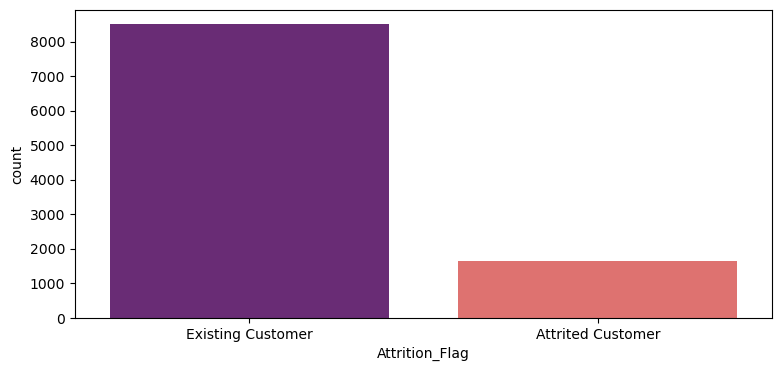

In [14]:
# Attrition_Flag Distribution

Attrition_count = df_drop['Attrition_Flag'].value_counts()

fig = plt.figure(figsize= (9,4))
sns.countplot(data = df_drop,
              x = "Attrition_Flag",
              palette="magma",
              order = df_drop["Attrition_Flag"].value_counts(ascending=False).index
              )


attrition_dist = px.pie(df_drop, names=df['Attrition_Flag'].value_counts().index, 
             title='Attrition Flag Distribution',
             color_discrete_sequence= px.colors.qualitative.Antique,
             values = df_drop['Attrition_Flag'].value_counts().values,
             width=800, height=400
            )

attrition_dist

In [15]:
# Gender Distribution

gender_dist = px.bar(x = df_drop["Gender"].value_counts().index, 
                y = df_drop["Gender"].value_counts().values,
                color_discrete_sequence= px.colors.qualitative.Antique,
                color= df_drop["Gender"].value_counts().values,
                title= "Gender Distribution",
                width= 800, height=400)

gender_dist.update_layout(showlegend=True,
                     xaxis_title="Gender", yaxis_title="Count")

gender_dist


In [16]:
# Education Level Distribtion

Education_level_dist = px.histogram(df_drop, x='Education_Level', 
                   title='Education Level Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Education_level_dist.update_xaxes(categoryorder='total ascending')

Education_level_dist

In [17]:
# Martial Status Distribution

Marital_Status_dist = px.histogram(df, x='Marital_Status', 
                   title='Marital_Status Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Marital_Status_dist

In [18]:
# Income Distribution

Income_dist = px.histogram(df, x='Income_Category', 
                   title='Income_Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   width= 800, height=400)

Income_dist.update_xaxes(categoryorder='total ascending')

Income_dist

In [19]:
# Card Category Distribution

Card_Category_dist = px.histogram(df_drop, x='Card_Category', 
                   title='Card Category Distribution',
                   color_discrete_sequence= px.colors.qualitative.Antique,
                   text_auto=True,
                   width= 800, height=400,
                   template = "seaborn")

Card_Category_dist.update_xaxes(categoryorder='total ascending')

Card_Category_dist.show()

Numerical Data Exploration

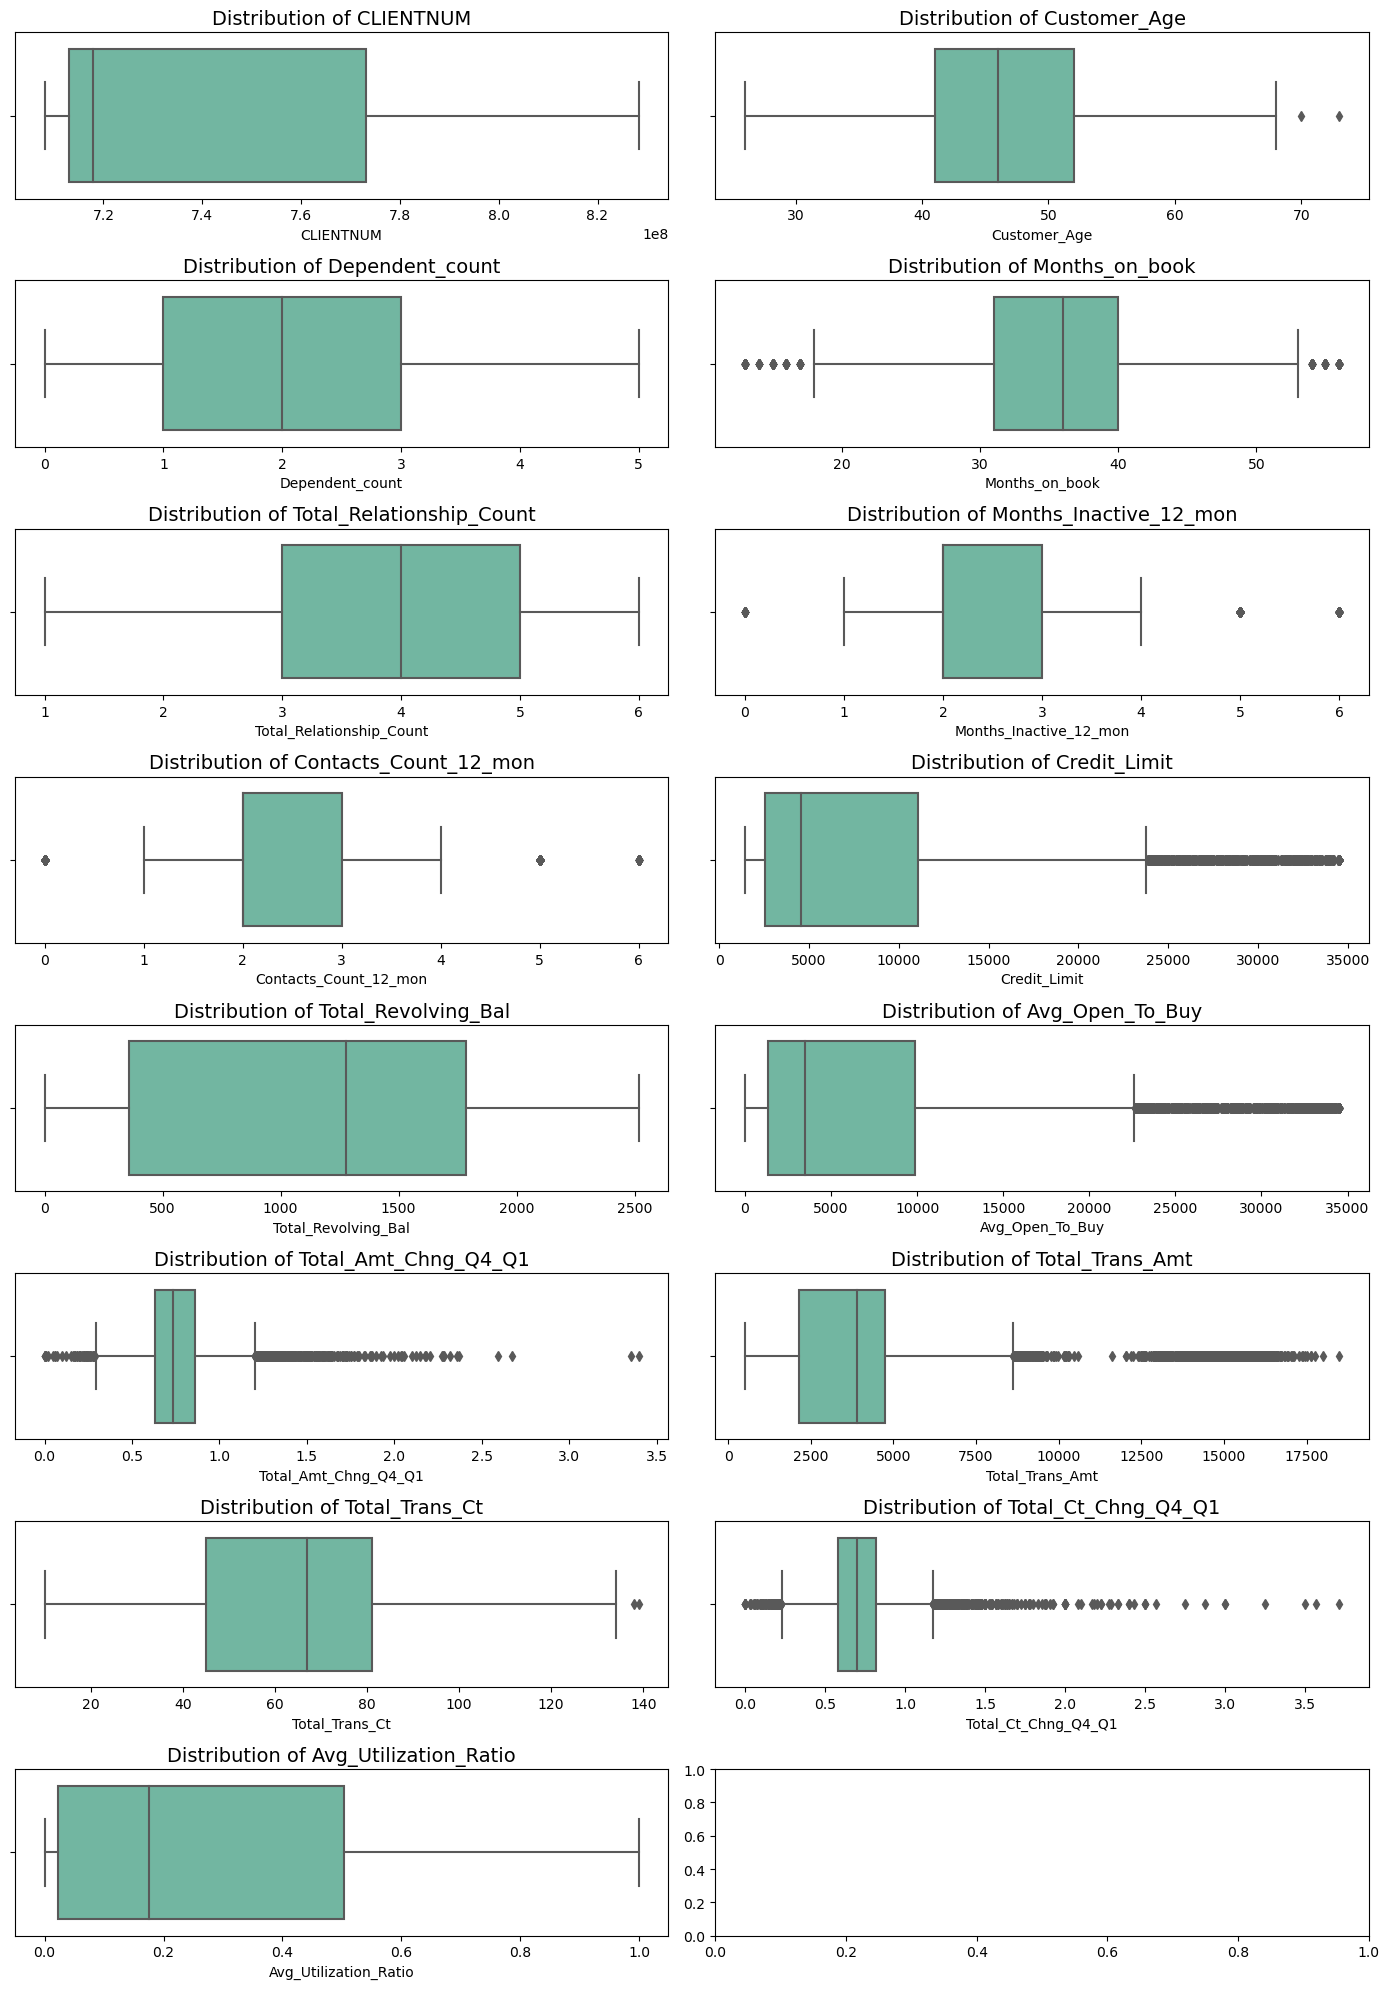

In [20]:
fig, axes = plt.subplots(8, 2, figsize= (14,20))

for i, column in enumerate(numerical_data):
    row = i // 2 # return int of the outcome
    col = i  % 2 # return remainder of the division
    sns.boxplot(data=df_drop, x=column,
                ax=axes[row, col],
                palette="Set2",
                color="skyblue")
    
    axes[row, col].set_title(f"Distribution of {column}",
                             fontsize=14)
    
plt.tight_layout()

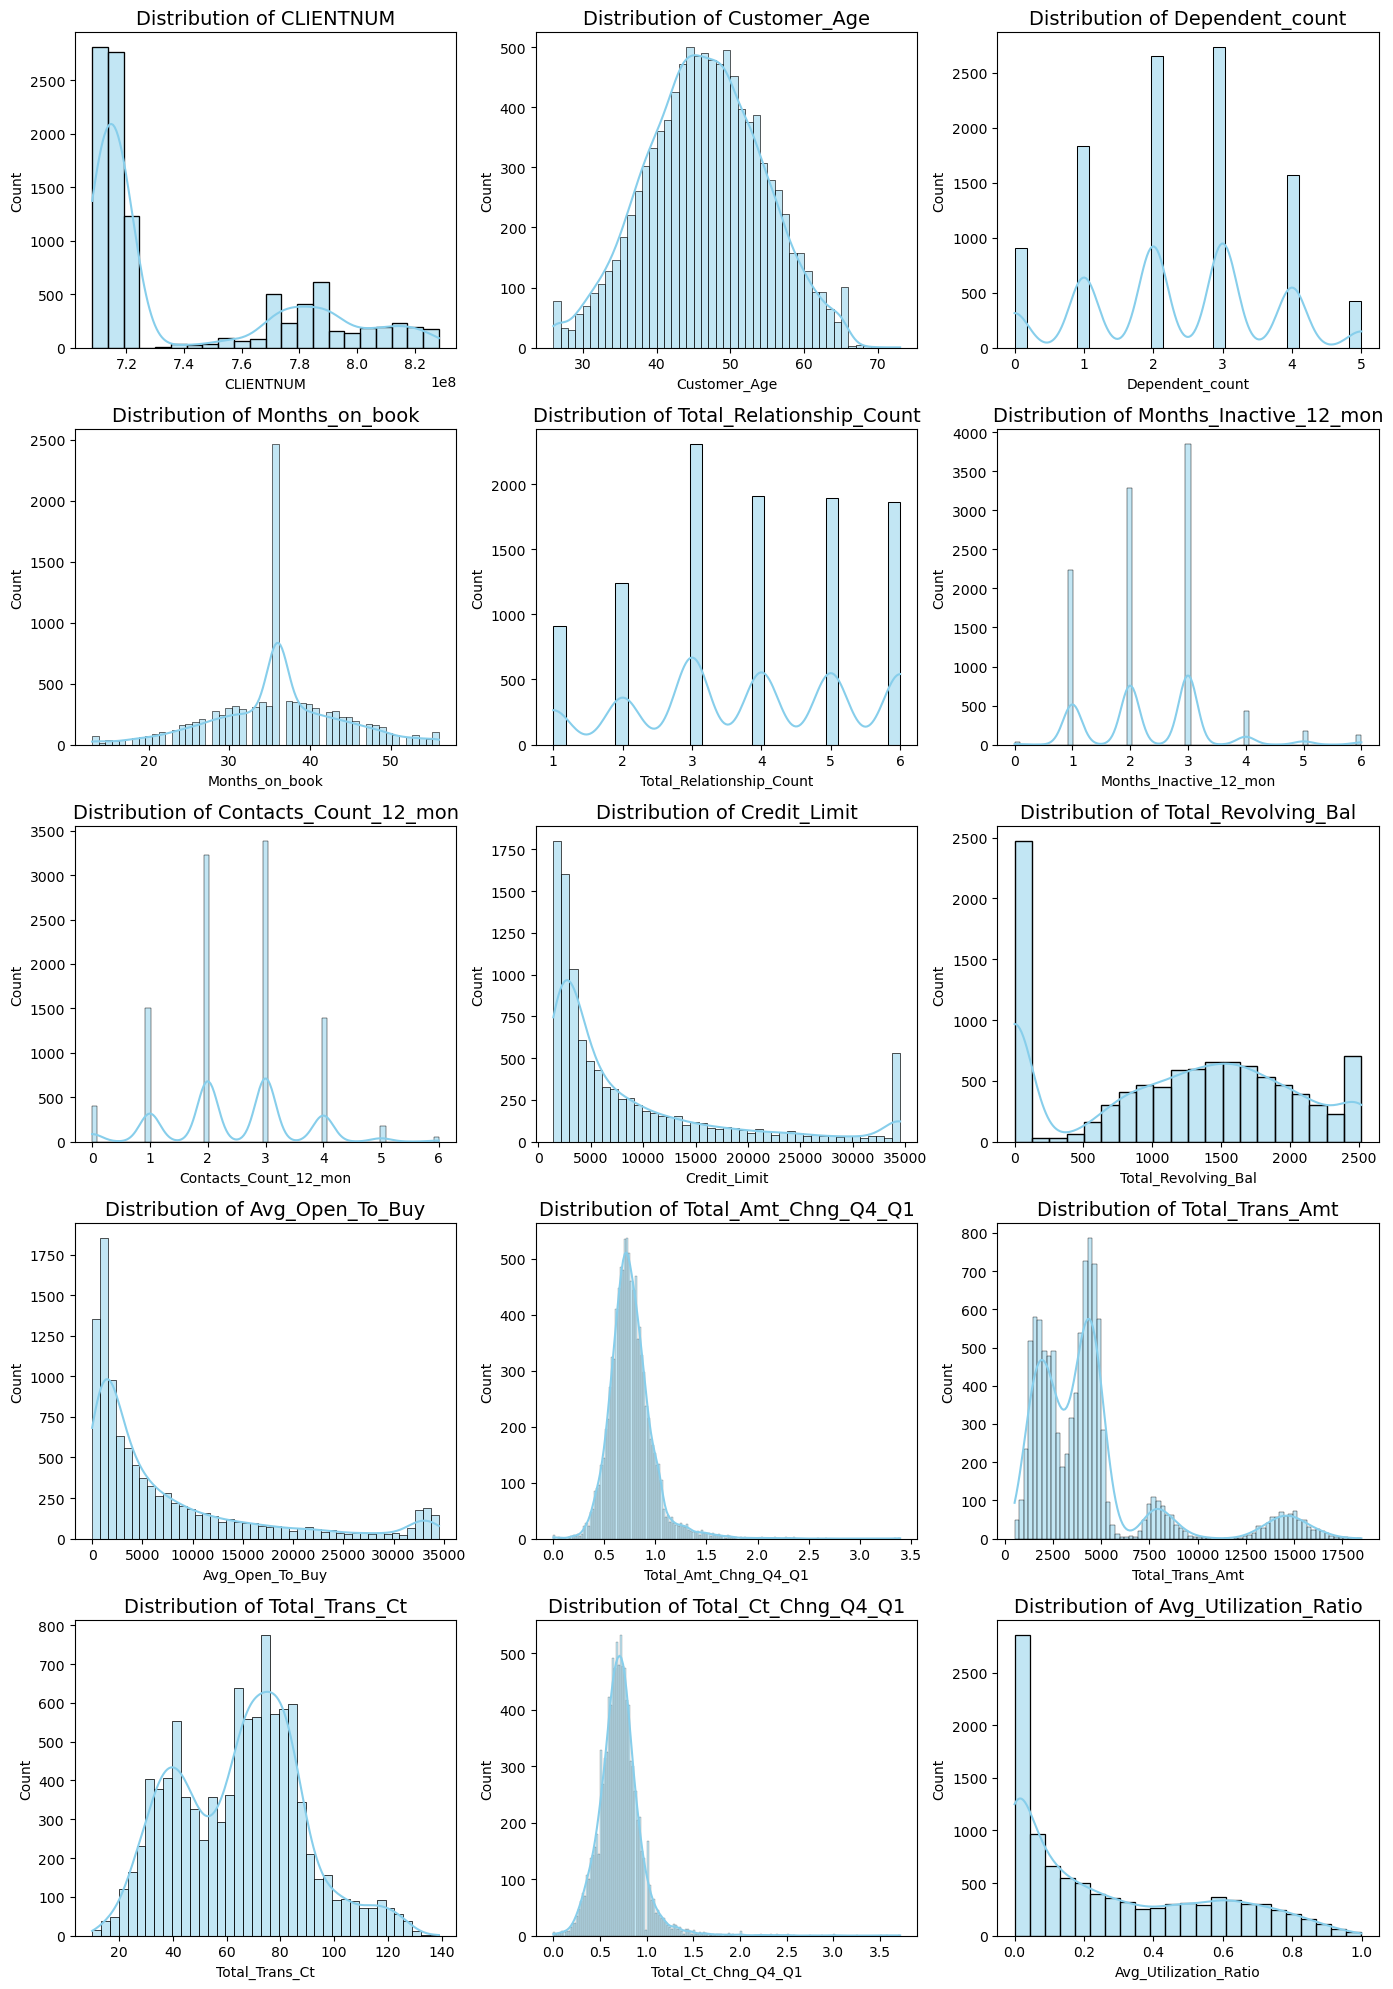

In [21]:
fig, axes = plt.subplots(5, 3, figsize=(14, 20))

for i, column in enumerate(numerical_data):
    row = i // 3 # int division, return int
    col = i % 3 # return remainder
    sns.histplot(data=df_drop, x=column,
                 kde=True, ax=axes[row, col],
                 color='skyblue')
    axes[row, col].set_title(f"Distribution of {column}",
                   fontsize=14)

plt.tight_layout()

    3.2 - Bivariate Analysis

    What is the relationship between churn status & Categorical variables?

In [22]:
fig = px.histogram(df_drop, x="Gender",
                   color="Attrition_Flag",
                   title="Churn Rate by Gender",
                   barmode="group",
                   template='plotly_white',
                   color_discrete_sequence=['#ff7f0e', '#3498db'])

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.show()

In [23]:
fig = px.histogram(df_drop, x="Education_Level", 
                   color="Attrition_Flag",
                   barmode="group",
                   title="Churn Rate by Gender")

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.show()

In [24]:
fig = px.histogram(df_drop, x="Marital_Status",
                   color="Attrition_Flag",
                   title= "Churn Rate by Martial Status",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [25]:
fig = px.histogram(df_drop, x="Income_Category",
                   color="Attrition_Flag",
                   title= "Churn Rate by Income Category",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [26]:
fig = px.histogram(df_drop, x="Card_Category",
                   color="Attrition_Flag",
                   title= "Churn Rate by Card Category",
                   barmode="group")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()

    What is the relationship between churn status & numerical variables?

Correlation between age & churn status

In [27]:
fig = px.histogram(df_drop, x="Customer_Age", 
                   color="Attrition_Flag",
                   barmode="group",
                   marginal="box",
                   title="Churn Rate by Age",
                   labels={"Customer_Age": "Age"})

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [28]:
fig = px.box(df_drop,  y="Credit_Limit", x="Attrition_Flag",
             color="Attrition_Flag",
             title="Correlation Between Credit limit & Churn Rate",
             labels={"Credit_Limit":"Credit Limit"})

# Format the layout
fig.update_layout(
    yaxis=dict(showgrid=False, zeroline=False),
    xaxis=dict(title='Credit Limit', zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [29]:
fig = px.box(df_drop,  y="Contacts_Count_12_mon", x="Attrition_Flag",
             color="Attrition_Flag",
             title="Correlation Between 12-month Contacts & Churn Rate",
             labels={"Contacts_Count_12_mon":"12-Month Countact"})

# Format the layout
fig.update_layout(
    yaxis=dict(showgrid=False, zeroline=False),
    xaxis=dict(title='Credit Limit', zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

4. Data Pre-Processing

In [30]:
# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

4.1 - Outliers

In [31]:
# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_data, n=1.5)
number_of_outliers = len(outliers_indices)

# Print the number of outliers
print(f'Number of outliers: {number_of_outliers}')

'''
# Removing all Outliers
df = df.drop(outliers_indices)
'''

Number of outliers: 1274


'\n# Removing all Outliers\ndf = df.drop(outliers_indices)\n'

4.2 - Handling Categorical Data

- Nominal (One-hot encoding): Categories without a meaningful order or ranking like (Attrition Flag, Gender, Marital Status).

- Ordinal (Ordinal Encoding): Categories with a meaningful order or ranking like (Education Level, Income Category, Card Category).

In [32]:
# Working with Ordinal Features with pandas `map` method.

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df_drop['Attrition_Flag'] = df_drop['Attrition_Flag'].map(attrition_flag_dic)

df_drop['Education_Level'] = df_drop['Education_Level'].map(edu_level_dic)

df_drop['Income_Category'] = df_drop['Income_Category'].map(income_cat_dic)

df_drop['Card_Category'] = df_drop['Card_Category'].map(card_cat_dic)

In [33]:
# Working with Nominal Features with pandas `get_dummies` function.
df_drop = pd.get_dummies(df_drop, columns=['Gender', 'Marital_Status'])

4.3 - Data Split into Train & Test Set

In [34]:
x = df_drop.drop(["Attrition_Flag"], axis=1)
y = df_drop["Attrition_Flag"]

print(f"X shape: {x.shape}")
print(f"y shape: {y.shape}")

X shape: (10127, 24)
y shape: (10127,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (8101, 24)
X_test: (2026, 24)


4.4 - Handling Numerical Data: Feature Scaling (Standardise Scaler)

In [36]:
# Create Scaler
scaler = StandardScaler()

# Fitting the Scaler onto dataset 
scaler.fit(X_train[numerical_data])

# Transform the numerical features in X-input data
X_train_scaled = scaler.transform(X_train[numerical_data])
X_test_scaled = scaler.transform(X_test[numerical_data])

# Replace scaled feature value back into dataset
X_train[numerical_data] = X_train_scaled
X_test[numerical_data] = X_test_scaled

In [37]:
X_test

CLIENTNUM  Customer_Age  Dependent_count  Education_Level  \
3879  -0.648295     -0.542010        -1.035584                3   
7006  -0.774982     -0.791454         0.507837                0   
8066   1.331811      0.331041         0.507837                0   
2097  -0.808854     -1.664506        -1.035584                5   
5367  -0.761833      0.455763        -1.035584                6   
...         ...           ...              ...              ...   
421   -0.554345     -0.167845         0.507837                5   
8280   2.192014      0.206320         1.279548                2   
7295   1.522520     -0.167845         0.507837                2   
2449  -0.670279     -1.415062        -0.263873                3   
7019  -0.723217     -1.290341         1.279548                0   

      Income_Category  Card_Category  Months_on_book  \
3879                1              0        0.004277   
7006                1              0       -0.623360   
8066                1              2       -0.748888   
2097                2              0       -1.502052   
5367                4              0        0.004277   
...               ...            ...             ...   
421                 4              0       -0.497833   
8280                0              0        1.008496   
7295                2              0        0.380859   
2449                1              0       -2.255216   
7019                1              0       -1.250997   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3879                  1.407401                1.658161              -1.311579   
7006                  0.763875                3.656638              -1.311579   
8066                  0.120348                0.658923              -0.410689   
2097                  0.763875               -1.339554              -0.410689   
5367                  0.763875                0.658923               0.490202   
...                        ...                     ...                    ...   
421                   0.763875               -0.340316              -0.410689   
8280                 -1.810231               -0.340316              -1.311579   
7295                  1.407401                1.658161              -1.311579   
2449                 -0.523178                0.658923              -0.410689   
7019                 -0.523178               -0.340316               0.490202   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3879     -0.611658             0.819201        -0.684600   
7006     -0.748979            -0.420339        -0.710736   
8066      0.822176            -1.434958         0.950136   
2097     -0.303545             0.622703        -0.359114   
5367      1.152123             1.292525         1.035411   
...            ...                  ...              ...   
421       1.764249             1.675633         1.612734   
8280     -0.658762             1.675633        -0.808415   
7295     -0.633714            -1.434958        -0.504636   
2449     -0.309198             1.675633        -0.459119   
7019     -0.790287            -1.434958        -0.661088   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3879              0.048161        -0.714621       -0.629067   
7006              0.057273        -0.027750        0.353864   
8066             -0.466692        -0.070439        0.182920   
2097             -0.348230        -0.628651       -0.201706   
5367             -0.617047        -0.162634        0.567545   
...                    ...              ...             ...   
421               0.690587        -0.851283       -0.970956   
8280             -0.266218        -0.001663        0.695754   
7295             -1.268586        -0.138622       -0.030761   
2449              2.007334        -0.676379       -1.398318   
7019              0.303309         0.148933        0.866698   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  Gender_M  \
3879 

4.5 - Handling Imbalance dataset using Synthetic Minority Oversampling Technique (SMOTE)
- Randomly average selected minority class, to create next dataset

In [38]:
# Original data count 
y_train.value_counts()

0    6783
1    1318
Name: Attrition_Flag, dtype: int64

In [39]:
# Data count after SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f"X_train_sm shape: {X_train_sm.shape}")
print(f"y_train_sm shape: {y_train_sm.shape}")
print(f"Unique Value Count in y_train_sm: {y_train_sm.value_counts()}")

X_train_sm shape: (13566, 24)
y_train_sm shape: (13566,)
Unique Value Count in y_train_sm: 0    6783
1    6783
Name: Attrition_Flag, dtype: int64


5. Model Training & Evaluation

In [40]:
# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score, mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

    5.1: Cross Validation to test between different classifier model

In [41]:
# Setting random_state = 42 allows the randomness of number generator across classifier to be the same

Classfiers = [
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs= -1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, n_jobs=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs=-1)),
]

##### Recursive Feature Elimination (RFE)
- Fit model to dataset
- Eliminate feature with smallest coefficient (least important)
- Repeat step 1-2 unti desire number of features is reached

In [42]:
# RFE input (algorithm, number of features)

RFE_selector = RFE(
    lgb.LGBMClassifier(random_state=42,verbose=-1), 
    n_features_to_select=12
)

Loop through all the classifier --> to compare accuracy score

In [43]:
# Create list for classifier names, mean test accuracy score, results

results = []

# Loop through Classifiers variable for (model name, model)
for model_name, model in Classfiers:
    print(f"{model_name}:")
    
    # Create steps for pipeline
    steps = []
    steps.append(
        ("feature_selector", RFE_selector)
    )
    
    steps.append(
        (model_name, model)
    )
    
    # Create pipeline
    pipeline = Pipeline(steps=steps)
    
    # 5-fold Stratified CV parameter, to be use in CV below
    cv = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=42
    )
    
    # Perform Cross Validation with train scores
        # cv_result to return 4 outputs(fit_time, score_time, test_score, train_score)
    cv_result = cross_validate(
        pipeline, X_train_sm, y_train_sm, cv=cv, scoring="accuracy", 
        n_jobs=-1, return_train_score=True
    )
        
    print(f"Cross-Validation Completed Successfully for {model_name}")
    print("*" *50)
    
    # Results to append result from cv_result
    results.append({
        "Model_Name": model_name,
        "Mean_Train_Accuracy": np.mean(cv_result["train_score"]),
        "Mean_Test_Accuracy": np.mean(cv_result["test_score"])
    }) 

Random Forest:
Cross-Validation Completed Successfully for Random Forest
**************************************************
AdaBoost:
Cross-Validation Completed Successfully for AdaBoost
**************************************************
Gradient Boosting:
Cross-Validation Completed Successfully for Gradient Boosting
**************************************************
LightGBM:
Cross-Validation Completed Successfully for LightGBM
**************************************************
XGBoost:
Cross-Validation Completed Successfully for XGBoost
**************************************************


In [44]:
# Show cv_result in pandas DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("Mean_Test_Accuracy", ascending=True)
results_df

Model_Name  Mean_Train_Accuracy  Mean_Test_Accuracy
0      Random Forest             1.000000            0.977517
1           AdaBoost             0.959236            0.954961
2  Gradient Boosting             0.973627            0.967786
3           LightGBM             0.998640            0.981498
4            XGBoost             0.999975            0.982677

In [45]:
# Result visualised 

fig = px.bar(
    results_df, x="Mean_Test_Accuracy", y="Model_Name",
    orientation="h",
    color="Mean_Test_Accuracy",
    title="Mean Test Accuracy Score by Classifier",
    color_continuous_scale='viridis'
)

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    # total ascending/category ascending
    yaxis=dict(categoryorder='total ascending'), 
    showlegend=False,
    height=500,
    width=900
)

fig

    5.2: Training Chosen Model (XGBoost Classifier)

- Feature Selection

In [46]:
# Initiate RFE feature Selector 
RFE_selector.fit(X_train_sm, y_train_sm)

# Get the indices of the selected features 
selected_feature_indice = RFE_selector.support_
selected_feature_name = X_train_sm.columns[selected_feature_indice]
selected_feature_name

  File "c:\Users\Zac Chen\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


Index(['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

* Training XGBoost Model

In [47]:
# Define pipeline
pipeline = Pipeline(
    steps=[
        ("feature_selector", RFE_selector),
        ("XGBoost", xgb.XGBClassifier(random_state=42, n_job=-1))
    ]
)

# fit training data to pipeline
pipeline.fit(X_train_sm, y_train_sm)

# use model to predict on test data
y_pred = pipeline.predict(X_test)

- Measure performance of model using Matrix

In [48]:
# Calculate F1-score
f1 = f1_score(
    y_test, y_pred, average="weighted"
)

# Calculate training accuracy (y_train vs prediction of X_train)
training_accuracy = accuracy_score(
    y_train_sm, pipeline.predict(X_train_sm)
)

# Calculate testing accuracy (y_test vs prediction of X_test)
testing_accuracy = accuracy_score(
    y_test, y_pred
)

# Calculate root mean square error(rmse)
rmse = mean_squared_error(
    y_test, y_pred, squared=False
)

# Confusion matrix of y_test
testing_confusion_matrix = confusion_matrix(
    y_test, y_pred
)

# Classification report of y_test
classification_report = classification_report(
    y_test, y_pred
)

- Print out matrix

In [49]:
print(f"Model: XGBoost")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
print(f"F1-score: {f1}")
print(f"Root Mean Square Error: {rmse}")
print("-" *60)
print(f"Testing Confusion Matrix: \n{testing_confusion_matrix}")
print("-" *60)
print(f"Classification Report: \n{classification_report}")

Model: XGBoost
Training Accuracy: 0.9999262863039953
Testing Accuracy: 0.9733464955577492
F1-score: 0.9734856863957841
Root Mean Square Error: 0.16325901029422768
------------------------------------------------------------
Testing Confusion Matrix: 
[[1686   31]
 [  23  286]]
------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1717
           1       0.90      0.93      0.91       309

    accuracy                           0.97      2026
   macro avg       0.94      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



6. Hyperparameter Tuning for XGBoost

- Grid Search: Search every combination of parameter (Library: GridSearchCV)
- Random Search: define a sampling distribution for each hyperparameter to carry out a randomized search
- Bayesian Optimization: sequential model-based optimization (SMBO) algorithm that uses the results from the previous iteration to decide the next hyperparameter value candidates (Library: Hyperopt, Optuna)

In [54]:
import optuna
from optuna import trial, visualization
from optuna.samplers import TPESampler

 - Tree Specific Hyperparamter - Control the construction & complexity of tree
    - "max_depth": max level/depth of trees
    - "min_child_weight": min sum of instance weight needed in a child
    - "subsample": controls percentage of observaions use for each tree
    - "colsample_bytree": control percentage of columns used for each tree
    - "n_estimators": controls number of trees 
        
- Learning Task-Specific Hyparameter - Control overall behavior of model learning process
    - "learning_rate": step size 
    - "gamma": minimum loss reduction required to make further partition on leaf node (use for pruning)
    - "lambda": L2 regularization on weights, larger -> more conservative 
    - "aplha": :1 regularization on weights, larger -> more conservative
    - "objective": Loss function 
    - "eval_metric": Metric for monitoring performance (auc, roc, rmse)

In [51]:
def objective(trial):
    param_space = {
        # Tree Specific Hyperparamter - Control the construction & complexity of tree
        "max_depth": trial.suggest_int(
            "max_depth", 3,10
        ),
        "min_child_weight": trial.suggest_int(
            "min_child_weight", 1, 300
        ),
        "subsample": trial.suggest_categorical(
            "subsample", [0.6, 0.7, 0.8, 1]
        ),
        "n_estimators": trial.suggest_categorical(
            "n_estimators", [150, 200, 300, 3000]
        ),
        
        # Learning Task-Specific Hyparameter - Control overall behavior of model learning process
        "learning_rate": trial.suggest_categorical(
            'learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]
        ),
        "gamma": trial.suggest_uniform(
            "gamma", 0, 4
        ),
        "lambda": trial.suggest_loguniform(
            "lambda", 1e-3, 10
        ),
        "aplha": trial.suggest_loguniform(
            "aplha", 1e-3, 10
        ),
        "random_state": 42
    }
    
    model = xgb.XGBClassifier(**param_space)
    model.fit(
        X_train_sm, y_train_sm, eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return rmse

In [55]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)
print("Number of finished trials:", len(study.trials))

[I 2024-01-08 16:26:16,931] A new study created in memory with name: no-name-7c9b79e9-7881-4617-8d2c-ade035f63425


[I 2024-01-08 16:26:17,457] Trial 0 finished with value: 0.2463955359142288 and parameters: {'max_depth': 6, 'min_child_weight': 47, 'subsample': 0.7, 'n_estimators': 300, 'learning_rate': 0.008, 'gamma': 3.4277421757060593, 'lambda': 0.8418323784744828, 'aplha': 1.373624912869191}. Best is trial 0 with value: 0.2463955359142288.
[I 2024-01-08 16:26:17,742] Trial 1 finished with value: 0.28102196799459955 and parameters: {'max_depth': 7, 'min_child_weight': 216, 'subsample': 1, 'n_estimators': 200, 'learning_rate': 0.012, 'gamma': 2.9742654086427973, 'lambda': 0.0027238136470225946, 'aplha': 1.4161679735592647}. Best is trial 0 with value: 0.2463955359142288.
[I 2024-01-08 16:26:18,042] Trial 2 finished with value: 0.2922155555378971 and parameters: {'max_depth': 8, 'min_child_weight': 194, 'subsample': 0.7, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 0.26954532386964836, 'lambda': 5.252188176435769, 'aplha': 0.0037996056620891254}. Best is trial 0 with value: 0.24639553591422

Number of finished trials: 100


In [57]:
print(f"Best Trial Parameter:{study.best_params}")
print(f"Best Trial:{study.best_trial}")
study.trials_dataframe()

Best Trial Parameter:{'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6, 'n_estimators': 3000, 'learning_rate': 0.016, 'gamma': 0.5233650497212566, 'lambda': 0.0022012545479092975, 'aplha': 7.696782129569885}
Best Trial:FrozenTrial(number=82, state=TrialState.COMPLETE, values=[0.1473691632814626], datetime_start=datetime.datetime(2024, 1, 8, 16, 30, 10, 469721), datetime_complete=datetime.datetime(2024, 1, 8, 16, 30, 14, 34082), params={'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6, 'n_estimators': 3000, 'learning_rate': 0.016, 'gamma': 0.5233650497212566, 'lambda': 0.0022012545479092975, 'aplha': 7.696782129569885}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_child_weight': IntDistribution(high=300, log=False, low=1, step=1), 'subsample': CategoricalDistribution(choices=(0.6, 0.7, 0.8, 1)), 'n_estimators': CategoricalDistribution(choices=(150, 200, 300, 3000)), 'learning_ra

number     value             datetime_start          datetime_complete  \
0        0  0.246396 2024-01-08 16:26:16.932393 2024-01-08 16:26:17.456310   
1        1  0.281022 2024-01-08 16:26:17.458312 2024-01-08 16:26:17.742398   
2        2  0.292216 2024-01-08 16:26:17.742398 2024-01-08 16:26:18.042759   
3        3  0.194951 2024-01-08 16:26:18.042759 2024-01-08 16:26:21.467065   
4        4  0.314192 2024-01-08 16:26:21.467065 2024-01-08 16:26:21.683633   
..     ...       ...                        ...                        ...   
95      95  0.173518 2024-01-08 16:30:57.174605 2024-01-08 16:31:01.061150   
96      96  0.208411 2024-01-08 16:31:01.062151 2024-01-08 16:31:01.575900   
97      97  0.188515 2024-01-08 16:31:01.575900 2024-01-08 16:31:05.263167   
98      98  0.177734 2024-01-08 16:31:05.264165 2024-01-08 16:31:09.551101   
99      99  0.152310 2024-01-08 16:31:09.552101 2024-01-08 16:31:14.154578   

                 duration  params_aplha  params_gamma  params_lambda  \
0  0 days 00:00:00.523917      1.373625      3.427742       0.841832   
1  0 days 00:00:00.284086      1.416168      2.974265       0.002724   
2  0 days 00:00:00.300361      0.003800      0.269545       5.252188   
3  0 days 00:00:03.424306      1.526730      2.204160       0.034489   
4  0 days 00:00:00.216568      0.066776      0.547959       0.016988   
..                    ...           ...           ...            ...   
95 0 days 00:00:03.886545      2.735137      0.196547       0.002893   
96 0 days 00:00:00.513749      3.806653      0.283368       0.001870   
97 0 days 00:00:03.687267      5.078431      0.888808       0.001407   
98 0 days 00:00:04.286936      2.092508      0.124691       0.004177   
99 0 days 00:00:04.602477      8.562913      0.532091       0.008759   

    params_learning_rate  params_max_depth  params_min_child_weight  \
0                  0.008                 6                       47   
1                  0.012                 7                      216   
2                  0.010                 8                      194   
3                  0.014                 5                       42   
4                  0.008                10                      233   
..                   ...               ...                      ...   
95                 0.009                 3                       15   
96                 0.016                 4                        6   
97                 0.014                 3                       41   
98                 0.018                 5                       22   
99                 0.009                 4                        1   

    params_n_estimators  params_subsample     state  
0                   300               0.7  COMPLETE  
1                   200               1.0  COMPLETE  
2                   200               0.7  COMPLETE  
3                  3000               0.6  COMPLETE  
4                   150               1.0  COMPLETE  
..                  ...               ...       ...  
95                 3000               0.6  COMPLETE  
96                  300               0.7  COMPLETE  
97                 3000               0.6  COMPLETE  
98                 3000               0.6  COMPLETE  
99                 3000               0.6  COMPLETE  

[100 rows x 14 columns]

- plot_optimization_history: shows the scores from all trials as well as the best score so far at each point.

In [ ]:
optuna.visualization.plot_optimization_history(study)

- plot_parallel_coordinate: interactively visualizes the hyperparameters and scores

In [58]:
optuna.visualization.plot_parallel_coordinate(study)

- plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search went and which parts of the space were explored more

In [59]:
optuna.visualization.plot_slice(study)

- plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.

In [60]:
optuna.visualization.plot_contour(
    study, params=['max_depth',
                    'lambda',
                    'subsample',
                    'learning_rate',
                    'subsample']
)

- Visualize parameter importances

In [61]:
optuna.visualization.plot_param_importances(study)

- Create XGBoost Model with best parameter 

In [63]:
best_trial_param = study.best_trial.params
best_trial_param.update({"random_state": 42})
best_trial_param.update({"n_job":-1})
best_trial_param

{'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.6,
 'n_estimators': 3000,
 'learning_rate': 0.016,
 'gamma': 0.5233650497212566,
 'lambda': 0.0022012545479092975,
 'aplha': 7.696782129569885,
 'random_state': 42,
 'n_job': -1}

In [64]:
clf = xgb.XGBClassifier()
clf.set_params(**best_trial_param)

pipeline = Pipeline(
    steps=[
        ("feature_selector", RFE_selector),
        ("XGBoost", clf)
    ]
)

# fit training data to pipeline
pipeline.fit(X_train_sm, y_train_sm)

# use model to predict on test data
y_pred = pipeline.predict(X_test)

In [65]:
# Calculate F1-score
f1 = f1_score(
    y_test, y_pred, average="weighted"
)

# Calculate training accuracy (y_train vs prediction of X_train)
training_accuracy = accuracy_score(
    y_train_sm, pipeline.predict(X_train_sm)
)

# Calculate testing accuracy (y_test vs prediction of X_test)
testing_accuracy = accuracy_score(
    y_test, y_pred
)

# Calculate root mean square error(rmse)
rmse = mean_squared_error(
    y_test, y_pred, squared=False
)

# Confusion matrix of y_test
testing_confusion_matrix = confusion_matrix(
    y_test, y_pred
)


In [66]:
print(f"Model: XGBoost")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
print(f"F1-score: {f1}")
print(f"Root Mean Square Error: {rmse}")
print("-" *60)
print(f"Testing Confusion Matrix: \n{testing_confusion_matrix}")
print("-" *60)

Model: XGBoost
Training Accuracy: 0.9955034645437122
Testing Accuracy: 0.9772951628825272
F1-score: 0.9773549298175772
Root Mean Square Error: 0.15068124341626882
------------------------------------------------------------
Testing Confusion Matrix: 
[[1692   25]
 [  21  288]]
------------------------------------------------------------
